# 특징 디스크립터 검출기
- SIFT (Scale-Invariant Feature Transform)
- SURF (Speeded Up Robust Features)
- ORB (Oriented and Rotated BRIEF)

#### 라이브러리

In [2]:
# installs
#!pip install pytesseract
#!pip install pafy
#!pip install youtube_dl


# pytorch
import torch


# OpenCV, OCR
import cv2
import pytesseract
from skimage.transform import resize


# Youtube video
import pafy
import cv2


# Visualizatipn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

# time
from time import time

#### 차량 진입 사진 로드

In [3]:
import numpy as np
def imread(filename, flags=cv2.IMREAD_COLOR, dtype=np.uint8):
    try:
        n = np.fromfile(filename, dtype) 
        img = cv2.imdecode(n, flags) 
        return img 
    except Exception as e: 
        print(e) 
        return None

In [4]:
greencar01 = imread('./car_image/그린카진입01.jpg')
greencar02 = imread('./car_image/그린카진입02.jpg')
socar01 = imread('./car_image/쏘카진입01.jpg')
socar02 = imread('./car_image/쏘카진입02.jpg')

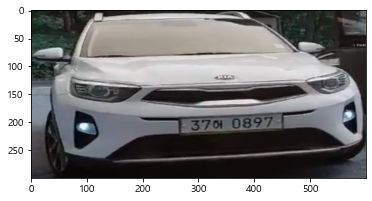

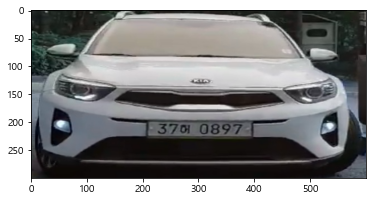

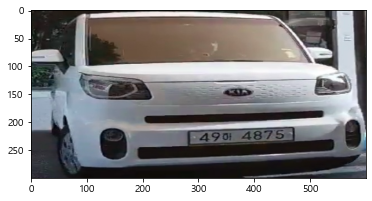

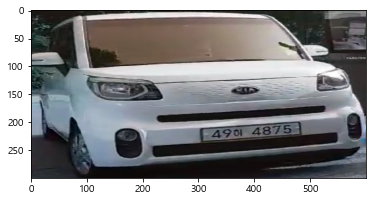

In [5]:
plt.imshow(greencar01); plt.show()
plt.imshow(greencar02); plt.show()
plt.imshow(socar01); plt.show()
plt.imshow(socar02); plt.show()


In [6]:
import numpy as np

In [7]:
car_images = [greencar01, greencar02, socar01, socar02]

#### SIFT (Scale-Invariant Feature Transform)

keypoint: 668 descriptor: (668, 128)
[[19.  1.  0. ...  9.  5. 22.]
 [15. 81. 42. ...  7.  1.  6.]
 [21. 25.  0. ...  1.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  9. 40.]
 [67. 33.  1. ...  3.  2.  1.]
 [ 3.  0.  0. ... 20.  4. 18.]]


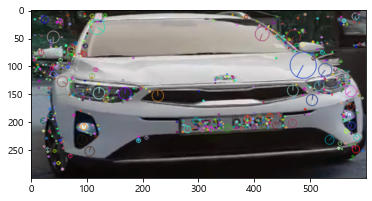

keypoint: 689 descriptor: (689, 128)
[[14.  3.  4. ...  0.  0.  0.]
 [ 0.  0. 11. ...  0.  0.  0.]
 [92.  0.  0. ...  0.  0.  0.]
 ...
 [ 1.  0.  0. ...  0.  0.  2.]
 [54. 17.  0. ...  0.  1.  2.]
 [ 0.  0.  0. ...  1. 37. 55.]]


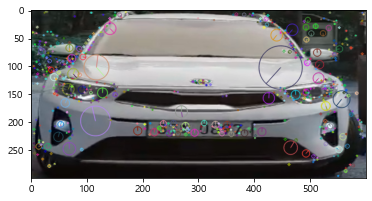

keypoint: 659 descriptor: (659, 128)
[[ 99.  65.  25. ...   0.   0.   0.]
 [ 21.  80.   3. ...   0.   0.   2.]
 [  3.   4.   7. ...   0.   0.   0.]
 ...
 [  1.   0.   1. ...   1.   0.   0.]
 [180.  41.   0. ...   0.   0.   0.]
 [  0.   0.   0. ... 103.   0.   0.]]


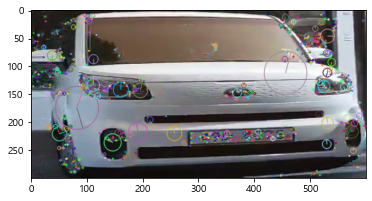

keypoint: 724 descriptor: (724, 128)
[[ 14.  10.   2. ...   0.   0.   0.]
 [ 41.  83. 139. ...   2.   7.  12.]
 [  0.  10.  53. ...   5.  31.  87.]
 ...
 [  1.   0.   0. ...  43.   0.   0.]
 [ 53.  22.   0. ...   0.   0.   0.]
 [  2.   0.   0. ...   9.   0.   4.]]


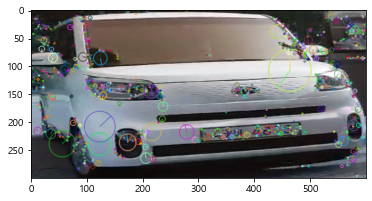

In [9]:
for car_image in car_images:

    # SIFT로 특징점 및 디스크립터 추출(desc_sift.py)
    copy_img = car_image.copy()
    gray = cv2.cvtColor(copy_img, cv2.COLOR_BGR2GRAY)

    # SIFT 추출기 생성
    sift = cv2.xfeatures2d.SIFT_create()
    # 키 포인트 검출과 서술자 계산
    keypoints, descriptor = sift.detectAndCompute(gray, None)
    print('keypoint:',len(keypoints), 'descriptor:', descriptor.shape)
    print(descriptor)

    # 키 포인트 그리기
    draw_img = cv2.drawKeypoints(copy_img, keypoints, None, \
                    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    # 결과 출력
    plt.imshow(draw_img)
    plt.show()

#### SURF (Speeded Up Robust Features)

(140, 128) [[ 8.43356655e-04  9.03410546e-04 -5.81782078e-05 ...  9.46202636e-05
   5.96636382e-05  5.96636382e-05]
 [ 1.20656943e-04  5.99807012e-04  0.00000000e+00 ...  1.75664283e-03
  -1.36078588e-05  1.36078588e-05]
 [ 4.50188199e-05  1.01539954e-04 -2.35936744e-03 ...  8.70117079e-03
  -2.48825178e-03  2.48825178e-03]
 ...
 [-3.50333750e-04  9.55641852e-04  3.03551555e-04 ...  3.33593460e-04
   3.99691316e-06  3.99691316e-06]
 [-4.28275147e-04  4.28275147e-04 -2.30403122e-04 ...  1.45606045e-05
  -1.96218817e-03  1.96218817e-03]
 [ 6.61646482e-05  6.61646482e-05  6.79432778e-05 ...  7.45514672e-06
  -2.92662316e-05  2.29586149e-04]]


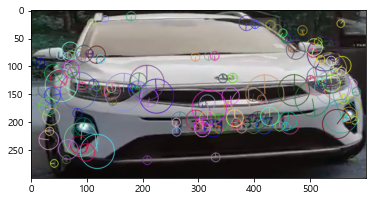

(146, 128) [[ 1.9809061e-03  2.0154698e-03 -6.5574430e-05 ...  7.9683181e-05
   1.4061522e-04  1.4061522e-04]
 [ 6.0563303e-05  3.9598520e-04 -1.9730432e-03 ...  1.4611618e-03
   1.6099926e-06  3.3444503e-06]
 [ 7.9480658e-04  1.1512371e-03 -1.5499860e-04 ...  3.2681513e-03
   9.2040646e-06  3.2510032e-04]
 ...
 [-5.2321417e-04  5.2321417e-04  0.0000000e+00 ...  3.2405150e-03
   2.4567384e-03  3.5779544e-03]
 [-2.0439830e-03  2.1064763e-03 -7.2376739e-04 ...  3.0333933e-04
   0.0000000e+00  0.0000000e+00]
 [ 1.3739143e-02  1.3919336e-02 -4.5412090e-03 ...  0.0000000e+00
   3.4194617e-04  3.6284476e-04]]


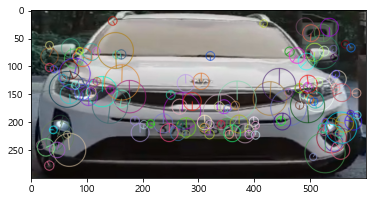

(156, 128) [[ 0.00522952  0.00608644  0.00043373 ...  0.         -0.00070368
   0.00070368]
 [ 0.00034058  0.00673234 -0.01192986 ...  0.00409314 -0.00391766
   0.00394229]
 [ 0.00107073  0.00108224 -0.00050171 ...  0.0001129   0.00877113
   0.00878561]
 ...
 [ 0.00118089  0.00398994 -0.00637888 ...  0.00222927  0.0002503
   0.00077218]
 [ 0.01295781  0.01334246 -0.00071889 ...  0.00010837  0.
   0.        ]
 [-0.00099788  0.00189416 -0.00032993 ...  0.00078677  0.00015638
   0.00015775]]


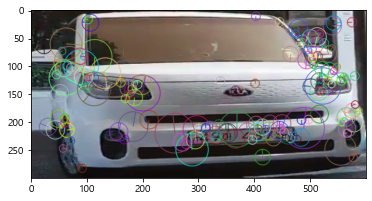

(194, 128) [[-3.0992247e-04  7.6737104e-04 -1.8650772e-04 ...  1.5655424e-03
  -1.0688510e-03  1.1347842e-03]
 [-8.7507541e-04  1.2010535e-03 -1.1841165e-04 ...  1.4028406e-03
  -5.6966243e-04  2.9752720e-03]
 [-1.2403592e-03  2.1482271e-03  1.8898833e-04 ...  6.7826285e-04
  -1.9764716e-03  2.0324262e-03]
 ...
 [-3.5623168e-03  3.5623168e-03  1.1027342e-02 ...  1.3657014e-03
   7.9964934e-04  9.5826760e-04]
 [ 3.0888505e-03  3.5584830e-03 -8.2934374e-04 ...  0.0000000e+00
   2.0812445e-04  2.0812445e-04]
 [-4.4575499e-04  1.5915468e-03  9.7112425e-05 ...  2.1662314e-03
   5.6776111e-03  5.6776111e-03]]


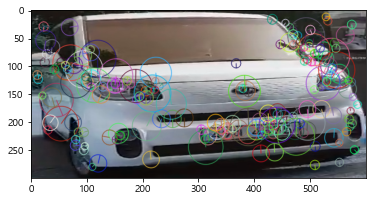

In [10]:
for car_image in car_images:

    # SURF로 특징점 및 특징 디스크립터 추출 (desc_surf.py)
    copy_img = car_image.copy()
    gray = cv2.cvtColor(copy_img, cv2.COLOR_BGR2GRAY)

    # SURF 추출기 생성 ( 경계:1000, 피라미드:3, 서술자확장:True, 방향적용:True)
    surf = cv2.xfeatures2d.SURF_create(1000, 3, True, True)
    # 키 포인트 검출 및 서술자 계산
    keypoints, desc = surf.detectAndCompute(gray, None)
    print(desc.shape, desc)
    # 키포인트 이미지에 그리기
    draw_img = cv2.drawKeypoints(copy_img, keypoints, None, \
                    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # 결과 출력
    plt.imshow(draw_img)
    plt.show()

#### ORB (Oriented and Rotated BRIEF)

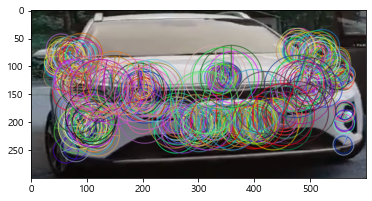

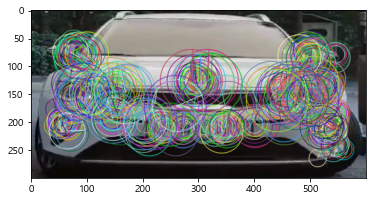

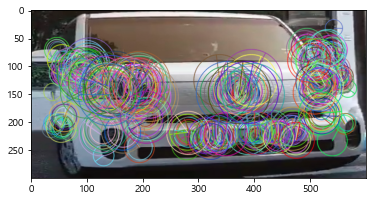

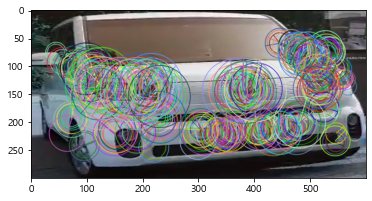

In [11]:
for car_image in car_images:

    # ORB로 특징점 및 특징 디스크립터 검출 (desc_orb.py)
    copy_img = car_image.copy()
    gray = cv2.cvtColor(copy_img, cv2.COLOR_BGR2GRAY)

    # ORB 추출기 생성
    orb = cv2.ORB_create()
    # 키 포인트 검출과 서술자 계산
    keypoints, descriptor = orb.detectAndCompute(copy_img, None)
    # 키 포인트 그리기
    draw_img = cv2.drawKeypoints(copy_img, keypoints, None, \
                 flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    # 결과 출력
    plt.imshow(draw_img)
    plt.show()